In [1]:
# for the sine function, what does the typical plot look like?
import numpy as np

xs = np.linspace(0,4*np.pi,5000)
ys = np.sin(xs)

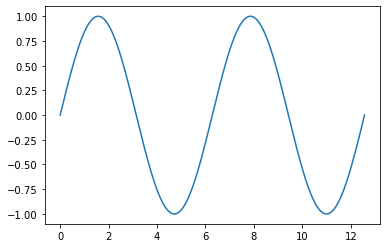

In [3]:
import matplotlib.pyplot as plt
plt.plot(xs, ys)

In [4]:
def sliding_window(time_series, d, tau):
    ''' Given a time series, return [f(t), f(t + tau), f(t + 2 * tau), ..., f(t + d * tau)];
    i.e. return a sliding window embedding'''
    sw_embedding = []
    for i in range(len(time_series) - ((d - 1) * tau)):  # -1 b/c python loop ends at last index
        sw_embedding.append(time_series[i:i + d * tau:tau])
    return sw_embedding

In [ ]:
from ripser import ripser
import sys
sys.path.append('../data/simple_egs')
import SphereExample as sphere

T = 2*np.pi
window_length_test_values = np.linspace(0,T,10)[1:]
dim_test_values = range(2,10)

mpers_results = np.zeros((len(window_length_test_values),len(dim_test_values)))
top_diff_results = np.zeros((len(window_length_test_values),len(dim_test_values)))
PD_results = {}

for i,wl in enumerate(window_length_test_values):
    for j,d in enumerate(dim_test_values):
        print(wl/T,d)
        
        tau = wl/d
    
        # construct a sliding window embedding
        swe = sliding_window(ys, d=d, tau= int(wl/(d*0.01)) )
        
        PDs = ripser(np.array(swe), maxdim=1, coeff=2)['dgms']
        
        PD_results[i,j] = PDs[1]
        res = (sphere.get_maximum_persistence(PDs)[1],sphere.get_top_diff_persistence(PDs)[1], sphere.get_num_features(PDs)[1])
        

        mpers_results[i,j] = res[0]
        top_diff_results[i,j] = res[1]

0.1111111111111111 2
0.1111111111111111 3
0.1111111111111111 4
0.1111111111111111 5
0.1111111111111111 6
0.1111111111111111 7
0.1111111111111111 8
0.1111111111111111 9
0.2222222222222222 2
0.2222222222222222 3
0.2222222222222222 4
0.2222222222222222 5
0.2222222222222222 6
0.2222222222222222 7
0.2222222222222222 8
0.2222222222222222 9
0.3333333333333333 2


<ipython-input-16-0edad501c81d>:27: RuntimeWarning: invalid value encountered in true_divide
  im2 = axs[1].imshow(np.divide(top_diff_results,mpers_results),cmap = plt.cm.magma)


ValueError: Format '283185307179586' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

<Figure size 432x288 with 0 Axes>

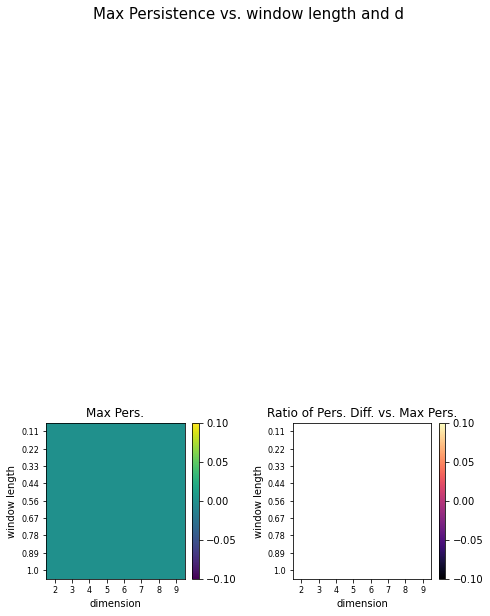

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.gcf().clear()
fig, axs = plt.subplots(1,2, figsize = (7,14))

ticksize = 8

im1 = axs[0].imshow(mpers_results)

axs[0].set_xlabel('dimension')
axs[0].set_xticks(np.arange(len(dim_test_values)))
axs[0].set_xticklabels(labels = list(dim_test_values),fontsize = ticksize)

axs[0].set_ylabel('window length')
axs[0].set_yticks(np.arange(len(window_length_test_values)))
axs[0].set_yticklabels(labels = list(np.around(window_length_test_values/T,2)),fontsize = ticksize)

axs[0].set_title('Max Pers.')

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im1,cax1,orientation = 'vertical')

### Do the other plot ###

im2 = axs[1].imshow(np.divide(top_diff_results,mpers_results),cmap = plt.cm.magma)

axs[1].set_xlabel('dimension')
axs[1].set_xticks(np.arange(len(dim_test_values)))
axs[1].set_xticklabels(labels = list(dim_test_values), fontsize = ticksize)


axs[1].set_ylabel('window length')
axs[1].set_yticks(np.arange(len(window_length_test_values)))
axs[1].set_yticklabels(labels = list(np.around(window_length_test_values/T,2)),fontsize = ticksize)
axs[1].set_title('Ratio of Pers. Diff. vs. Max Pers.')

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im2,cax2)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.suptitle('Max Persistence vs. window length and d', fontsize = 15)
plt.savefig('SimpleSineExample:wl{}dim{}T{}'.format(len(window_length_test_values),len(dim_test_values),T))

plt.show()